In [132]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing dataset

In [133]:
# reading the data
data = pd.read_csv(r"E:\Data Science\PGCM(DSFM)\III trimester\ML\Presentation\DATASETS\default of credit card clients.csv",names=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3'
,'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default'])

In [134]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0        NaN         X1   X2         X3        X4   X5     X6     X7     X8   
1         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
2          1      20000    2          2         1   24      2      2     -1   
3          2     120000    2          2         2   26     -1      2      0   
4          3      90000    2          2         2   34      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29997  29996     220000    1          3         1   39      0      0      0   
29998  29997     150000    1          3         2   43     -1     -1     -1   
29999  29998      30000    1          2         2   37      4      3      2   
30000  29999      80000    1          3         1   41      1     -1      0   
30001  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         X9  ...        X15        X16        X17       X18       X19   
1      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
2         -1  ...          0          0          0         0       689   
3          0  ...       3272       3455       3261         0      1000   
4          0  ...      14331      14948      15549      1518      1500   
...      ...  ...        ...        ...        ...       ...       ...   
29997      0  ...      88004      31237      15980      8500     20000   
29998     -1  ...       8979       5190          0      1837      3526   
29999     -1  ...      20878      20582      19357         0         0   
30000      0  ...      52774      11855      48944     85900      3409   
30001      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6                     default  
0           X20       X21       X22       X23                           Y  
1      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
2             0         0         0         0                           1  
3          1000      1000         0      2000                           1  
4          1000      1000      1000      5000                           0  
...         ...       ...       ...       ...                         ...  
29997      5003      3047      5000      1000                           0  
29998      8998       129         0         0                           0  
29999     22000      4200      2000      3100                           1  
30000      1178      1926     52964      1804                           1  
30001      1430      1000      1000      1000                           1  

[30002 rows x 25 columns]

# Column name and Dimension & Dropping Non-required values

In [135]:
# dropping non-required rows
data = data.tail(-2)

In [136]:
data

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
2          1     20000   2         2        1  24     2     2    -1    -1   
3          2    120000   2         2        2  26    -1     2     0     0   
4          3     90000   2         2        2  34     0     0     0     0   
5          4     50000   2         2        1  37     0     0     0     0   
6          5     50000   1         2        1  57    -1     0    -1     0   
...      ...       ...  ..       ...      ...  ..   ...   ...   ...   ...   
29997  29996    220000   1         3        1  39     0     0     0     0   
29998  29997    150000   1         3        2  43    -1    -1    -1    -1   
29999  29998     30000   1         2        2  37     4     3     2    -1   
30000  29999     80000   1         3        1  41     1    -1     0     0   
30001  30000     50000   1         2        1  46     0     0     0     0   

       ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
2      ...         0         0         0        0      689        0        0   
3      ...      3272      3455      3261        0     1000     1000     1000   
4      ...     14331     14948     15549     1518     1500     1000     1000   
5      ...     28314     28959     29547     2000     2019     1200     1100   
6      ...     20940     19146     19131     2000    36681    10000     9000   
...    ...       ...       ...       ...      ...      ...      ...      ...   
29997  ...     88004     31237     15980     8500    20000     5003     3047   
29998  ...      8979      5190         0     1837     3526     8998      129   
29999  ...     20878     20582     19357        0        0    22000     4200   
30000  ...     52774     11855     48944    85900     3409     1178     1926   
30001  ...     36535     32428     15313     2078     1800     1430     1000   

      PAY_AMT5 PAY_AMT6 default  
2            0        0       1  
3            0     2000       1  
4         1000     5000       0  
5         1069     1000       0  
6          689      679       0  
...        ...      ...     ...  
29997     5000     1000       0  
29998        0        0       0  
29999     2000     3100       1  
30000    52964     1804       1  
30001     1000     1000       1  

[30000 rows x 25 columns]

In [137]:
# check for null values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [138]:
# removing non-required columns
data = data.drop(('ID'),axis=1)

In [139]:
data

LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
2         20000   2         2        1  24     2     2    -1    -1    -2  ...   
3        120000   2         2        2  26    -1     2     0     0     0  ...   
4         90000   2         2        2  34     0     0     0     0     0  ...   
5         50000   2         2        1  37     0     0     0     0     0  ...   
6         50000   1         2        1  57    -1     0    -1     0     0  ...   
...         ...  ..       ...      ...  ..   ...   ...   ...   ...   ...  ...   
29997    220000   1         3        1  39     0     0     0     0     0  ...   
29998    150000   1         3        2  43    -1    -1    -1    -1     0  ...   
29999     30000   1         2        2  37     4     3     2    -1     0  ...   
30000     80000   1         3        1  41     1    -1     0     0     0  ...   
30001     50000   1         2        1  46     0     0     0     0     0  ...   

      BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
2             0         0         0        0      689        0        0   
3          3272      3455      3261        0     1000     1000     1000   
4         14331     14948     15549     1518     1500     1000     1000   
5         28314     28959     29547     2000     2019     1200     1100   
6         20940     19146     19131     2000    36681    10000     9000   
...         ...       ...       ...      ...      ...      ...      ...   
29997     88004     31237     15980     8500    20000     5003     3047   
29998      8979      5190         0     1837     3526     8998      129   
29999     20878     20582     19357        0        0    22000     4200   
30000     52774     11855     48944    85900     3409     1178     1926   
30001     36535     32428     15313     2078     1800     1430     1000   

      PAY_AMT5 PAY_AMT6 default  
2            0        0       1  
3            0     2000       1  
4         1000     5000       0  
5         1069     1000       0  
6          689      679       0  
...        ...      ...     ...  
29997     5000     1000       0  
29998        0        0       0  
29999     2000     3100       1  
30000    52964     1804       1  
30001     1000     1000       1  

[30000 rows x 24 columns]

In [140]:
# data dimension and headings
print(data.shape)
print(list(data.columns))

(30000, 24)
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


# Data Structure or type 

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 2 to 30001
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  object
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  object
 5   PAY_0      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  object
 12  BILL_AMT2  30000 non-null  object
 13  BILL_AMT3  30000 non-null  object
 14  BILL_AMT4  30000 non-null  object
 15  BILL_AMT5  30000 non-null  object
 16  BILL_AMT6  30000 non-null  object
 17  PAY_AMT1   30000 non-null  object
 18  PAY_AMT2   30000 non-null  object
 19  PAY_AMT3   30000 non-null  object
 20  PAY_AMT4   30000 non-null  o

In [142]:
# converting object datatype to int
data = data.astype(int)
print(data.dtypes)

LIMIT_BAL    int32
SEX          int32
EDUCATION    int32
MARRIAGE     int32
AGE          int32
PAY_0        int32
PAY_2        int32
PAY_3        int32
PAY_4        int32
PAY_5        int32
PAY_6        int32
BILL_AMT1    int32
BILL_AMT2    int32
BILL_AMT3    int32
BILL_AMT4    int32
BILL_AMT5    int32
BILL_AMT6    int32
PAY_AMT1     int32
PAY_AMT2     int32
PAY_AMT3     int32
PAY_AMT4     int32
PAY_AMT5     int32
PAY_AMT6     int32
default      int32
dtype: object


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 2 to 30001
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int32
 1   SEX        30000 non-null  int32
 2   EDUCATION  30000 non-null  int32
 3   MARRIAGE   30000 non-null  int32
 4   AGE        30000 non-null  int32
 5   PAY_0      30000 non-null  int32
 6   PAY_2      30000 non-null  int32
 7   PAY_3      30000 non-null  int32
 8   PAY_4      30000 non-null  int32
 9   PAY_5      30000 non-null  int32
 10  PAY_6      30000 non-null  int32
 11  BILL_AMT1  30000 non-null  int32
 12  BILL_AMT2  30000 non-null  int32
 13  BILL_AMT3  30000 non-null  int32
 14  BILL_AMT4  30000 non-null  int32
 15  BILL_AMT5  30000 non-null  int32
 16  BILL_AMT6  30000 non-null  int32
 17  PAY_AMT1   30000 non-null  int32
 18  PAY_AMT2   30000 non-null  int32
 19  PAY_AMT3   30000 non-null  int32
 20  PAY_AMT4   30000 non-null  int32
 21  PAY_AMT5   3

* The education column of the dataset has many categories and we need to reduce the categories for a better modelling

In [144]:
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
2          20000    2          2         1   24      2      2     -1     -1   
3         120000    2          2         2   26     -1      2      0      0   
4          90000    2          2         2   34      0      0      0      0   
5          50000    2          2         1   37      0      0      0      0   
6          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29997     220000    1          3         1   39      0      0      0      0   
29998     150000    1          3         2   43     -1     -1     -1     -1   
29999      30000    1          2         2   37      4      3      2     -1   
30000      80000    1          3         1   41      1     -1      0      0   
30001      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2         -2  ...          0          0          0         0       689   
3          0  ...       3272       3455       3261         0      1000   
4          0  ...      14331      14948      15549      1518      1500   
5          0  ...      28314      28959      29547      2000      2019   
6          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29997      0  ...      88004      31237      15980      8500     20000   
29998      0  ...       8979       5190          0      1837      3526   
29999      0  ...      20878      20582      19357         0         0   
30000      0  ...      52774      11855      48944     85900      3409   
30001      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
2             0         0         0         0        1  
3          1000      1000         0      2000        1  
4          1000      1000      1000      5000        0  
5          1200      1100      1069      1000        0  
6         10000      9000       689       679        0  
...         ...       ...       ...       ...      ...  
29997      5003      3047      5000      1000        0  
29998      8998       129         0         0        0  
29999     22000      4200      2000      3100        1  
30000      1178      1926     52964      1804        1  
30001      1430      1000      1000      1000        1  

[30000 rows x 24 columns]

In [145]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
2      20000    2          2         1   24      2      2     -1     -1   
3     120000    2          2         2   26     -1      2      0      0   
4      90000    2          2         2   34      0      0      0      0   
5      50000    2          2         1   37      0      0      0      0   
6      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
2     -2  ...          0          0          0         0       689         0   
3      0  ...       3272       3455       3261         0      1000      1000   
4      0  ...      14331      14948      15549      1518      1500      1000   
5      0  ...      28314      28959      29547      2000      2019      1200   
6      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
2         0         0         0        1  
3      1000         0      2000        1  
4      1000      1000      5000        0  
5      1100      1069      1000        0  
6      9000       689       679        0  

[5 rows x 24 columns]

# Data Exploration

* Bad Rate Analysis
* Bivariate Analysis 

In [146]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [147]:
sns.countplot(x='default',data=data,palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

In [148]:
data.groupby('default').mean()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE        AGE     PAY_0  \
default                                                                      
0        178099.726074  1.614150   1.841337  1.558637  35.417266 -0.211222   
1        130109.656420  1.567058   1.894665  1.528029  35.725738  0.668174   

            PAY_2     PAY_3     PAY_4     PAY_5  ...     BILL_AMT3  \
default                                          ...                 
0       -0.301917 -0.316256 -0.355633 -0.389488  ...  47533.365605   
1        0.458258  0.362116  0.254521  0.167872  ...  45181.598855   

            BILL_AMT4     BILL_AMT5     BILL_AMT6     PAY_AMT1     PAY_AMT2  \
default                                                                       
0        43611.165254  40530.445343  39042.268704  6307.337357  6640.465074   
1        42036.950573  39540.190476  38271.435503  3397.044153  3388.649638   

            PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6  
default                                                      
0        5753.496833  5300.529319  5248.220296  5719.371769  
1        3367.351567  3155.626733  3219.139542  3441.482068  

[2 rows x 23 columns]

# Visualizations

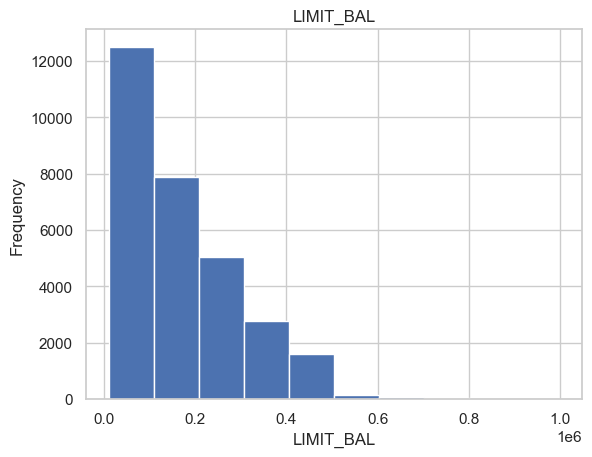

In [149]:
data.LIMIT_BAL.hist()
plt.title('LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.savefig('LIMIT_BAL')

In [150]:
sns.countplot(x='SEX',data=data,palette='husl')

<AxesSubplot:xlabel='SEX', ylabel='count'>

In [151]:
sns.countplot(x='EDUCATION',data=data,palette='hls')

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

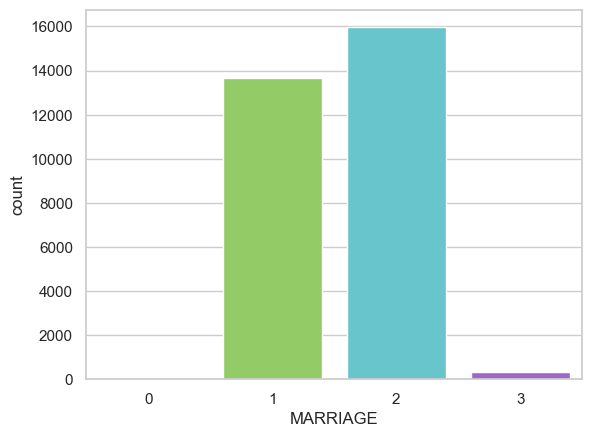

In [152]:
sns.countplot(x='MARRIAGE',data=data,palette='hls')

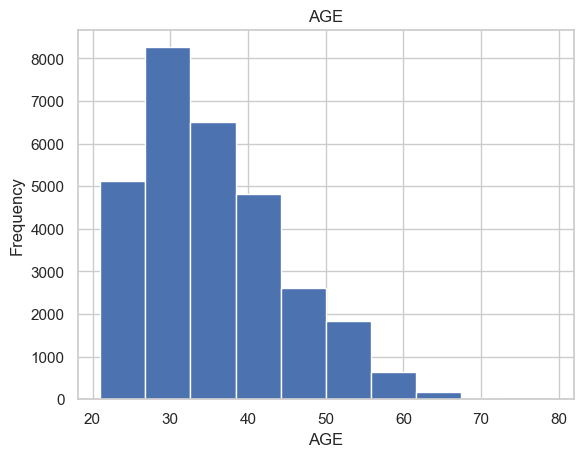

In [153]:
data.AGE.hist()
plt.title('AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.savefig('AGE')

In [154]:
data.PAY_0.hist()
plt.title('PAY_0')
plt.xlabel('Repayment status in September, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_0')

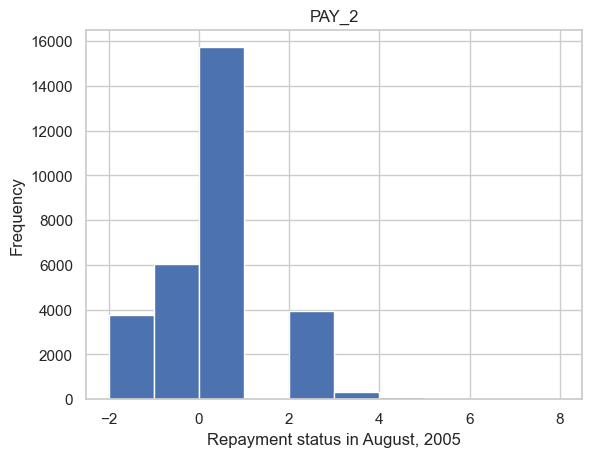

In [155]:
data.PAY_2.hist()
plt.title('PAY_2')
plt.xlabel('Repayment status in August, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_2')

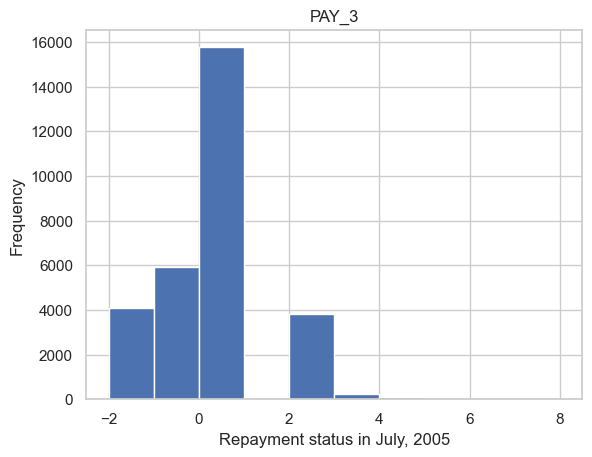

In [156]:
data.PAY_3.hist()
plt.title('PAY_3')
plt.xlabel('Repayment status in July, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_3')

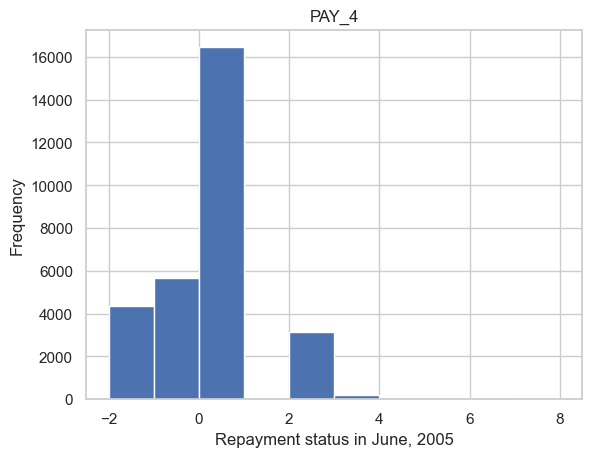

In [157]:
data.PAY_4.hist()
plt.title('PAY_4')
plt.xlabel('Repayment status in June, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_4')

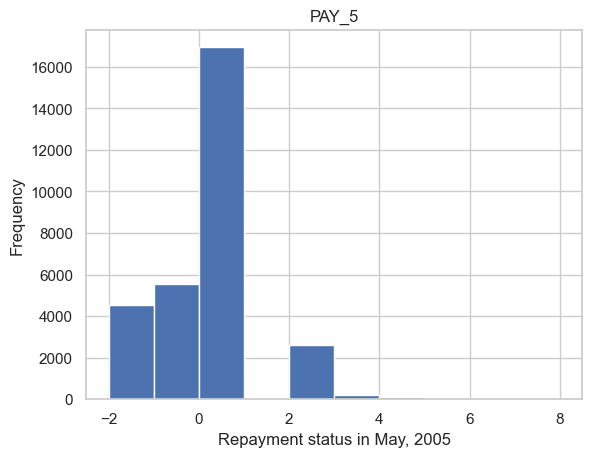

In [158]:
data.PAY_5.hist()
plt.title('PAY_5')
plt.xlabel('Repayment status in May, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_5')

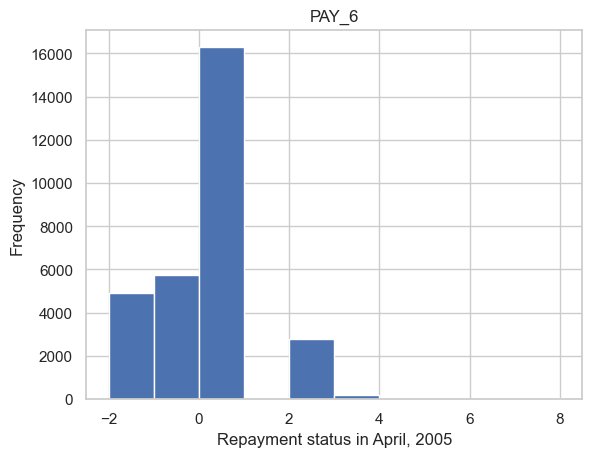

In [159]:
data.PAY_6.hist()
plt.title('PAY_6')
plt.xlabel('Repayment status in April, 2005')
plt.ylabel('Frequency')
plt.savefig('PAY_6')

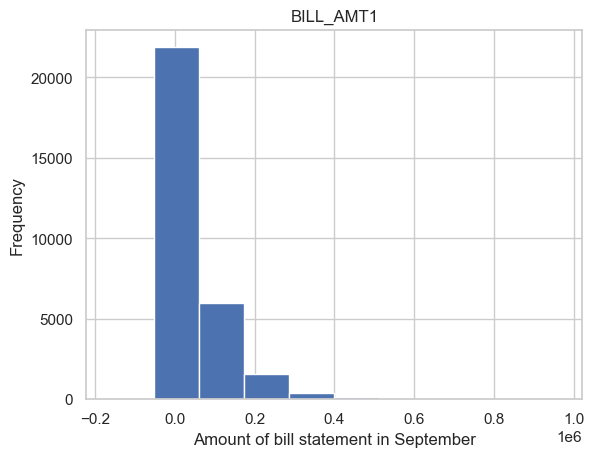

In [160]:
data.BILL_AMT1.hist()
plt.title('BILL_AMT1')
plt.xlabel('Amount of bill statement in September')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT1')

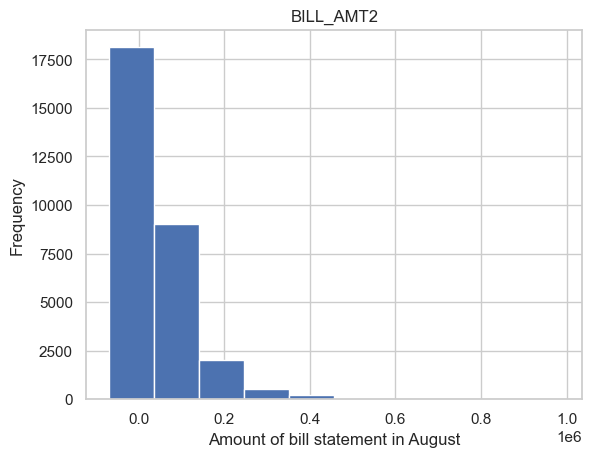

In [161]:
data.BILL_AMT2.hist()
plt.title('BILL_AMT2')
plt.xlabel('Amount of bill statement in August')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT2')

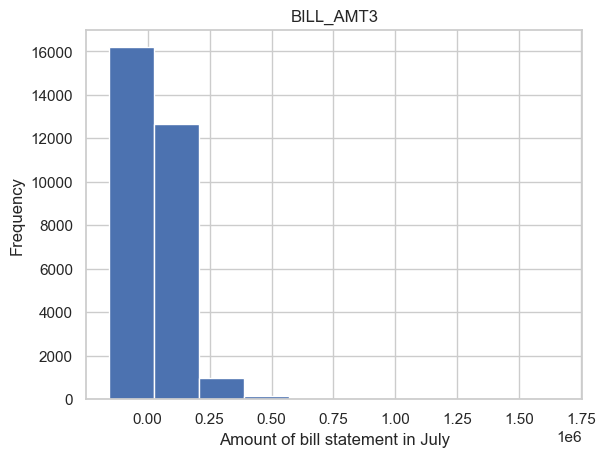

In [162]:
data.BILL_AMT3.hist()
plt.title('BILL_AMT3')
plt.xlabel('Amount of bill statement in July')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT3')

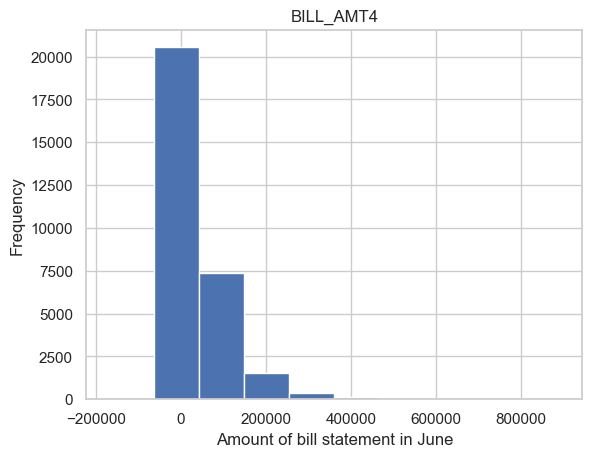

In [163]:
data.BILL_AMT4.hist()
plt.title('BILL_AMT4')
plt.xlabel('Amount of bill statement in June')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT4')

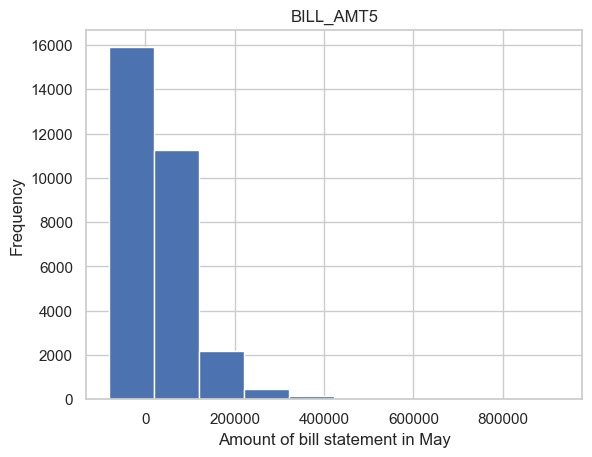

In [164]:
data.BILL_AMT5.hist()
plt.title('BILL_AMT5')
plt.xlabel('Amount of bill statement in May')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT5')

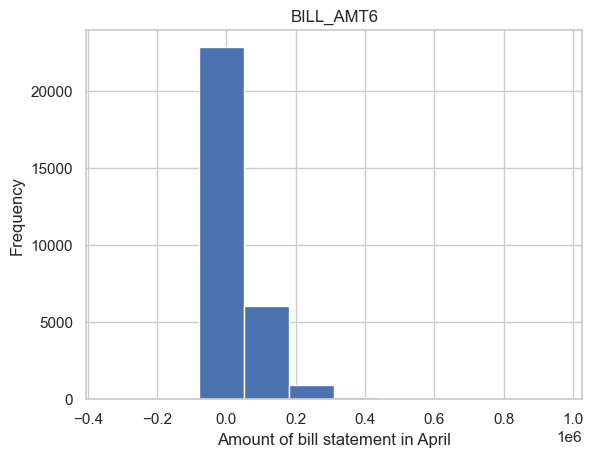

In [165]:
data.BILL_AMT6.hist()
plt.title('BILL_AMT6')
plt.xlabel('Amount of bill statement in April')
plt.ylabel('Frequency')
plt.savefig('BILL_AMT6')

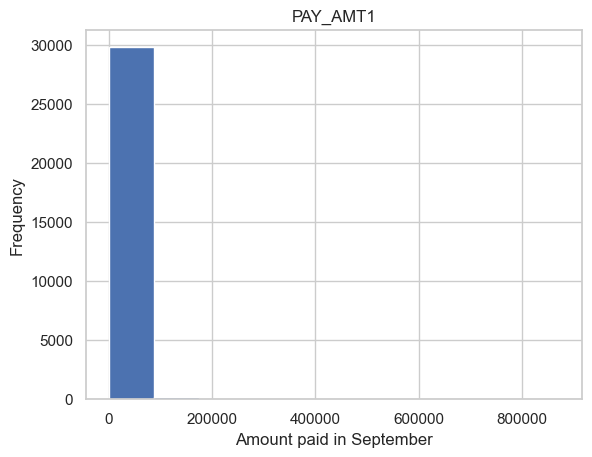

In [166]:
data.PAY_AMT1.hist()
plt.title('PAY_AMT1')
plt.xlabel('Amount paid in September')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT1')

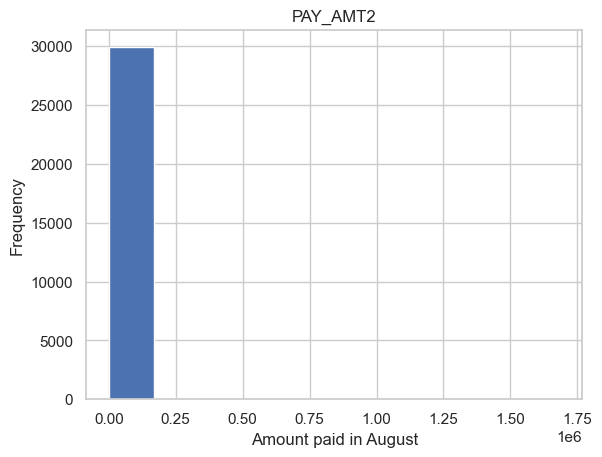

In [167]:
data.PAY_AMT2.hist()
plt.title('PAY_AMT2')
plt.xlabel('Amount paid in August')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT2')

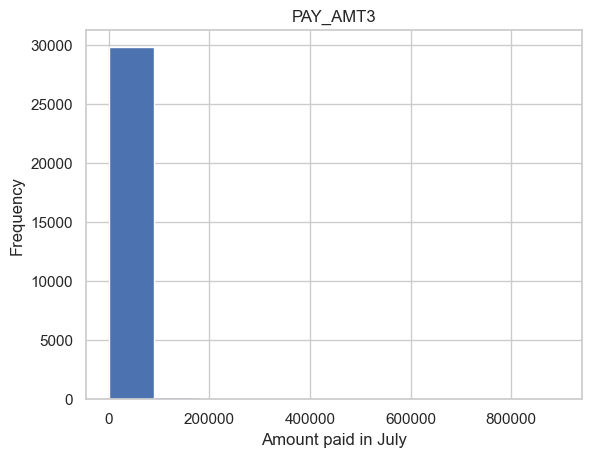

In [168]:
data.PAY_AMT3.hist()
plt.title('PAY_AMT3')
plt.xlabel('Amount paid in July')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT3')

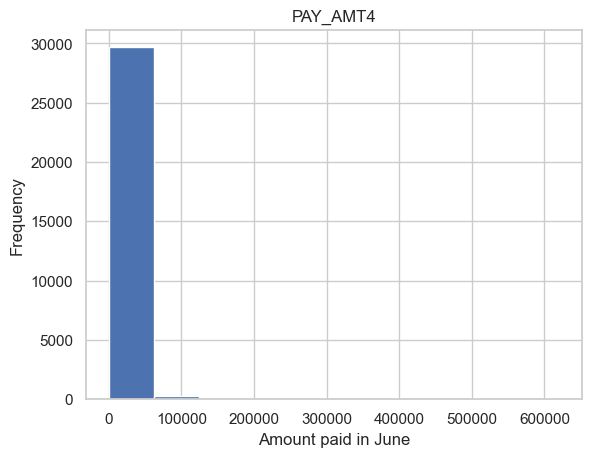

In [169]:
data.PAY_AMT4.hist()
plt.title('PAY_AMT4')
plt.xlabel('Amount paid in June')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT4')

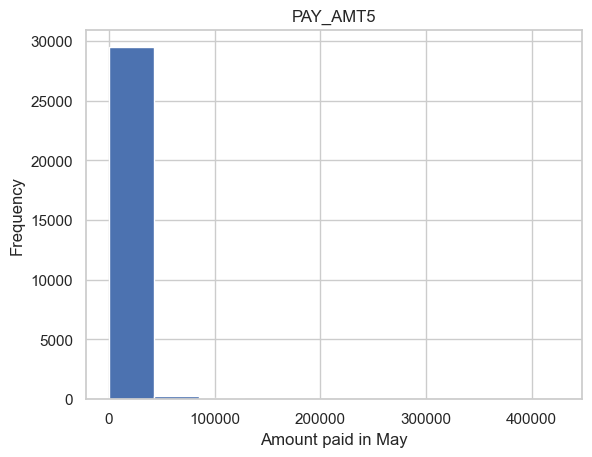

In [170]:
data.PAY_AMT5.hist()
plt.title('PAY_AMT5')
plt.xlabel('Amount paid in May')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT5')

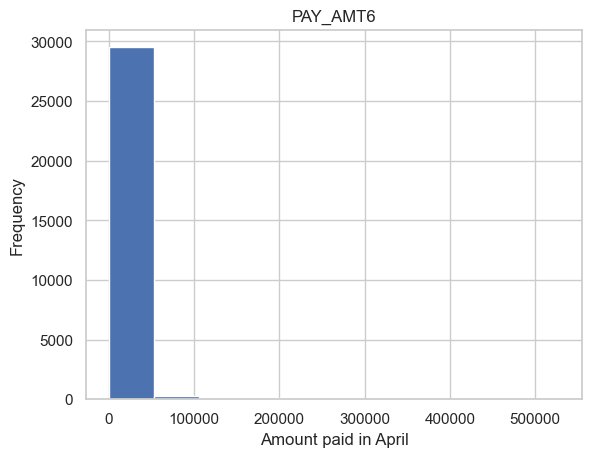

In [171]:
data.PAY_AMT6.hist()
plt.title('PAY_AMT6')
plt.xlabel('Amount paid in April')
plt.ylabel('Frequency')
plt.savefig('PAY_AMT6')

In [172]:
#['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'

<AxesSubplot:xlabel='default', ylabel='count'>

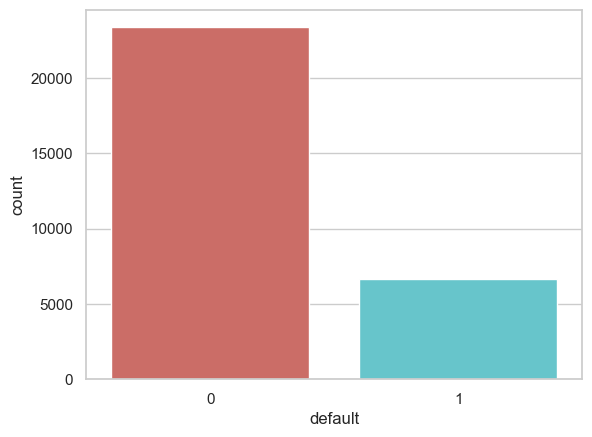

In [173]:
sns.countplot(x='default',data=data,palette='hls')

# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='LIMIT_BAL'>

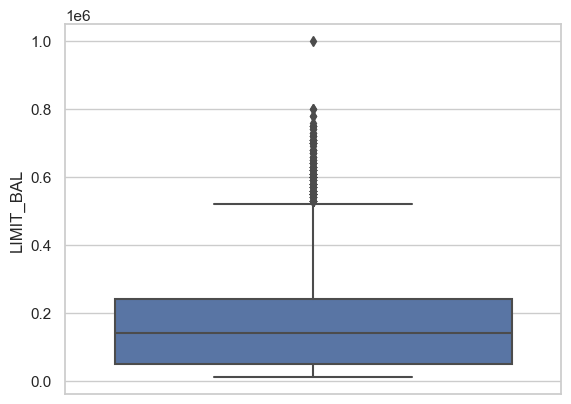

In [174]:
sns.boxplot(y='LIMIT_BAL',data=data)  # Single Variable

In [175]:
q1 = data['LIMIT_BAL'].quantile(0.25)   # outlier treatement
q3 = data['LIMIT_BAL'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-235000.0, 525000.0)

<AxesSubplot:ylabel='LIMIT_BAL'>

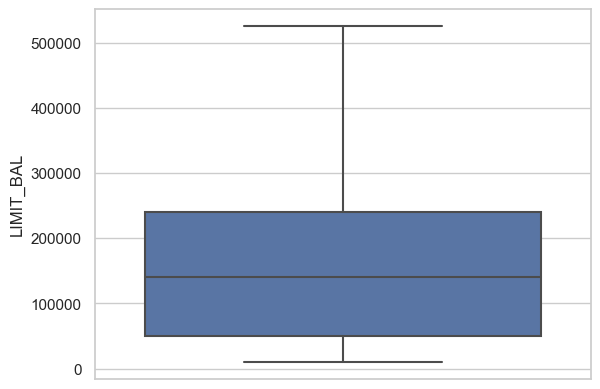

In [176]:
data['LIMIT_BAL']=np.where(data['LIMIT_BAL'] > high,high,data['LIMIT_BAL']) # higher limit

sns.boxplot(y='LIMIT_BAL',data=data)

<AxesSubplot:ylabel='SEX'>

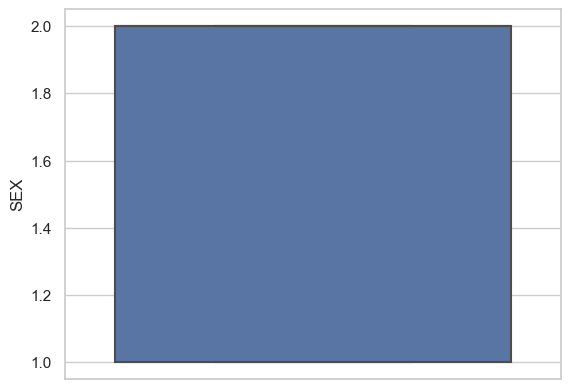

In [177]:
sns.boxplot(y='SEX',data=data)

<AxesSubplot:ylabel='EDUCATION'>

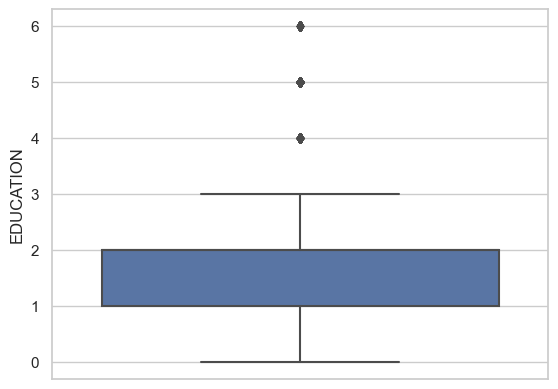

In [178]:
sns.boxplot(y='EDUCATION',data=data)

In [179]:
q1 = data['EDUCATION'].quantile(0.25)   # outlier treatement
q3 = data['EDUCATION'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-0.5, 3.5)

<AxesSubplot:ylabel='EDUCATION'>

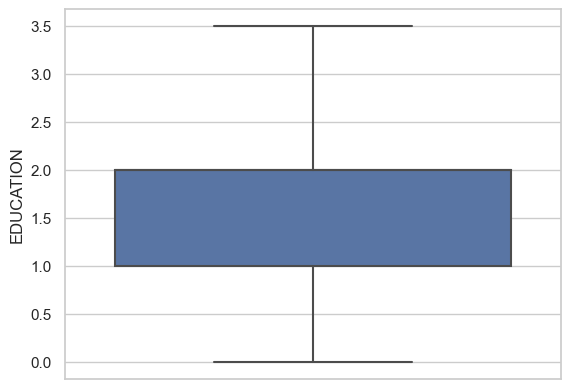

In [180]:
data['EDUCATION']=np.where(data['EDUCATION'] > high,high,data['EDUCATION']) # higher limit

sns.boxplot(y='EDUCATION',data=data)

<AxesSubplot:ylabel='MARRIAGE'>

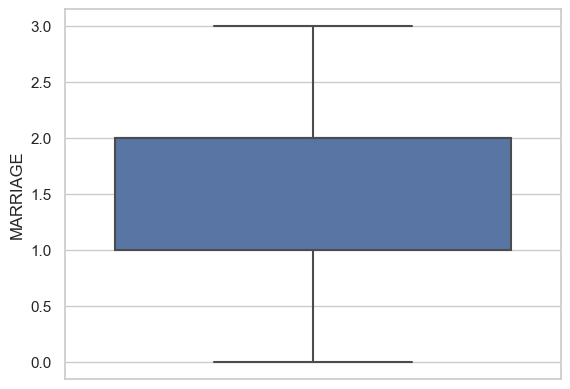

In [181]:
sns.boxplot(y='MARRIAGE',data=data)

<AxesSubplot:ylabel='AGE'>

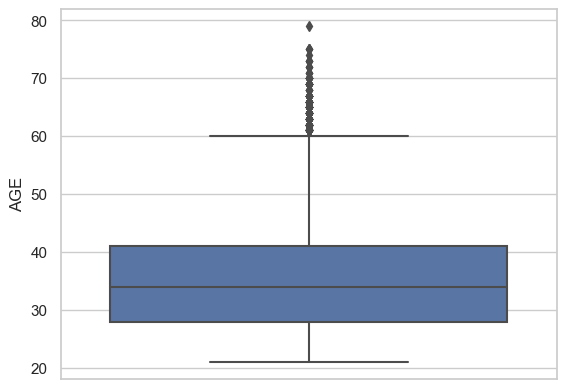

In [182]:
sns.boxplot(y='AGE',data=data)

In [183]:
q1 = data['AGE'].quantile(0.25)   # outlier treatement
q3 = data['AGE'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(8.5, 60.5)

<AxesSubplot:ylabel='AGE'>

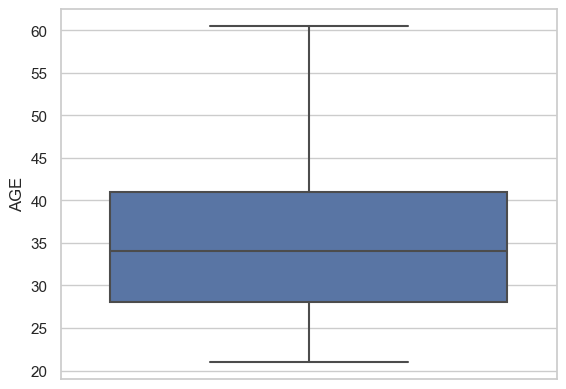

In [184]:
data['AGE']=np.where(data['AGE'] > high,high,data['AGE']) # higher limit

sns.boxplot(y='AGE',data=data)

<AxesSubplot:ylabel='PAY_0'>

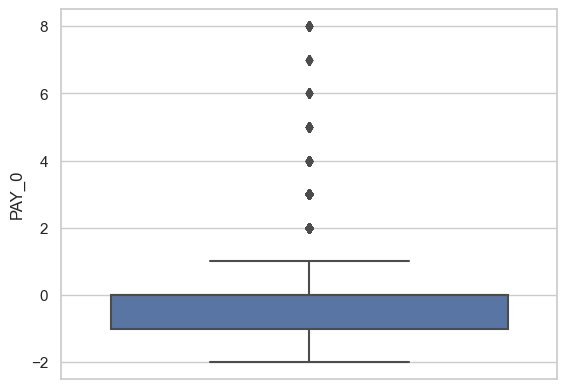

In [185]:
sns.boxplot(y='PAY_0',data=data)

In [186]:
q1 = data['PAY_0'].quantile(0.25)   # outlier treatement
q3 = data['PAY_0'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-2.5, 1.5)

<AxesSubplot:ylabel='PAY_0'>

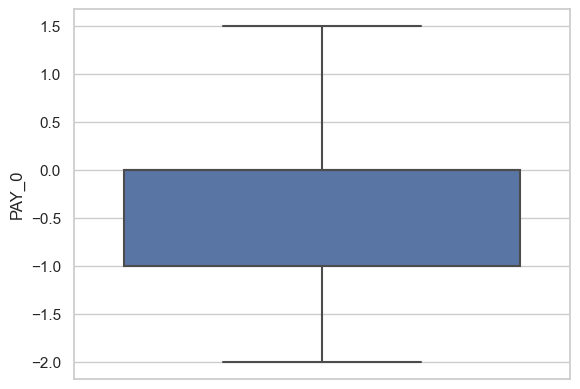

In [187]:
data['PAY_0']=np.where(data['PAY_0'] > high,high,data['PAY_0']) # higher limit

sns.boxplot(y='PAY_0',data=data)

<AxesSubplot:ylabel='PAY_2'>

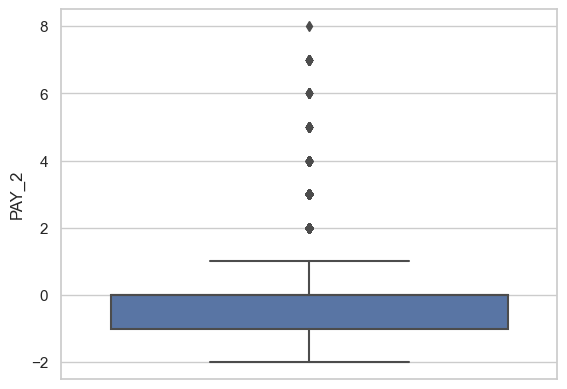

In [188]:
sns.boxplot(y='PAY_2',data=data)

<AxesSubplot:ylabel='PAY_2'>

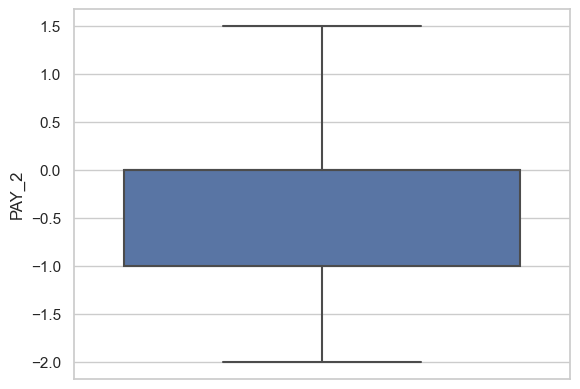

In [189]:
q1 = data['PAY_2'].quantile(0.25)   # outlier treatement
q3 = data['PAY_2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_2']=np.where(data['PAY_2'] > high,high,data['PAY_2']) # higher limit

sns.boxplot(y='PAY_2',data=data)

<AxesSubplot:ylabel='PAY_3'>

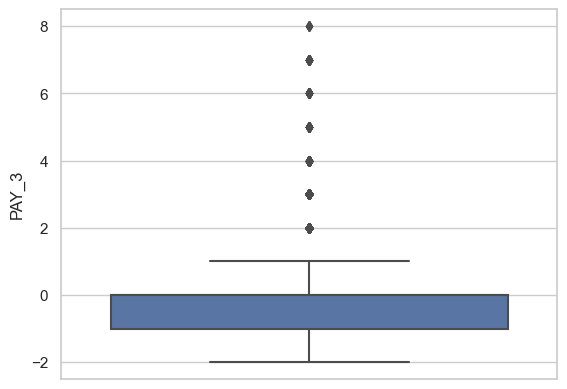

In [190]:
sns.boxplot(y='PAY_3',data=data)

<AxesSubplot:ylabel='PAY_3'>

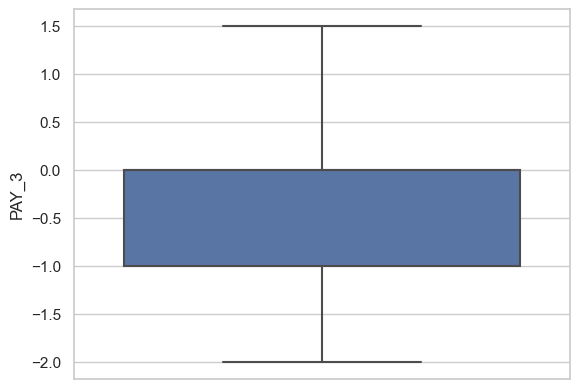

In [191]:
q1 = data['PAY_3'].quantile(0.25)   # outlier treatement
q3 = data['PAY_3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_3']=np.where(data['PAY_3'] > high,high,data['PAY_3']) # higher limit

sns.boxplot(y='PAY_3',data=data)

<AxesSubplot:ylabel='PAY_4'>

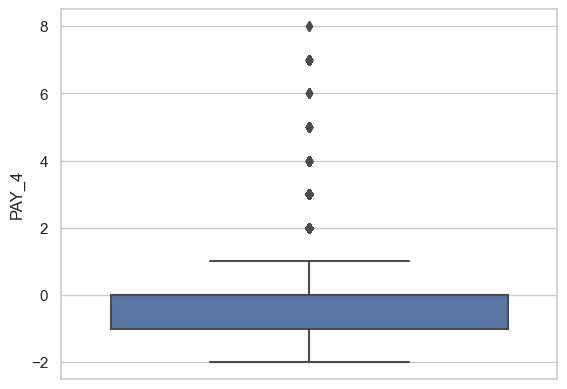

In [192]:
sns.boxplot(y='PAY_4',data=data)

<AxesSubplot:ylabel='PAY_4'>

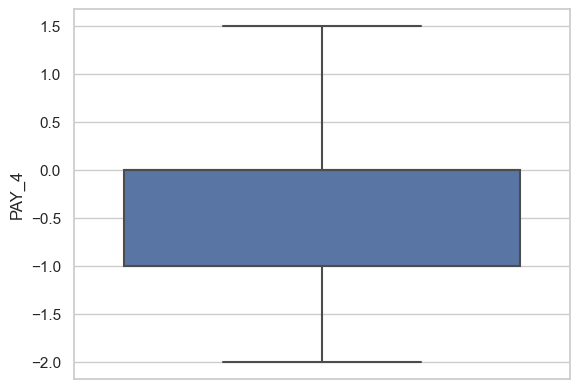

In [193]:
q1 = data['PAY_4'].quantile(0.25)   # outlier treatement
q3 = data['PAY_4'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_4']=np.where(data['PAY_4'] > high,high,data['PAY_4']) # higher limit

sns.boxplot(y='PAY_4',data=data)

<AxesSubplot:ylabel='PAY_5'>

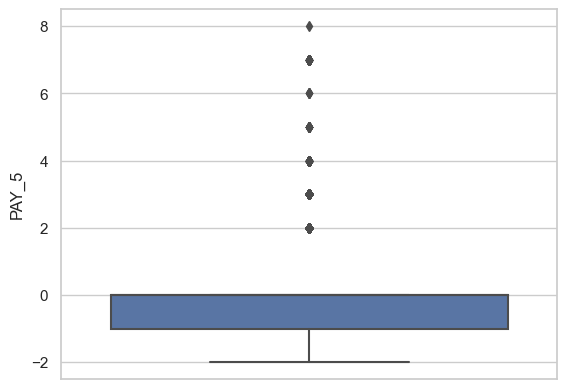

In [194]:
sns.boxplot(y='PAY_5',data=data)

<AxesSubplot:ylabel='PAY_5'>

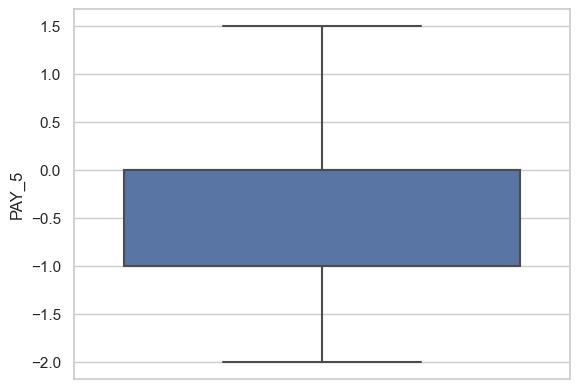

In [195]:
q1 = data['PAY_5'].quantile(0.25)   # outlier treatement
q3 = data['PAY_5'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_5']=np.where(data['PAY_5'] > high,high,data['PAY_5']) # higher limit

sns.boxplot(y='PAY_5',data=data)

<AxesSubplot:ylabel='PAY_6'>

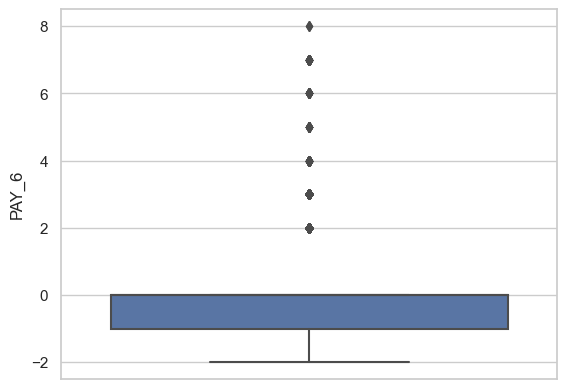

In [196]:
sns.boxplot(y='PAY_6',data=data)

<AxesSubplot:ylabel='PAY_6'>

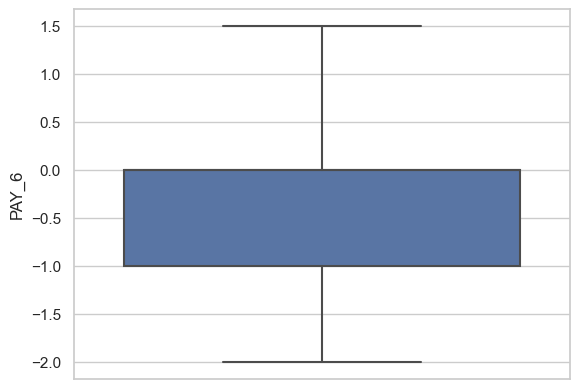

In [197]:
q1 = data['PAY_6'].quantile(0.25)   # outlier treatement
q3 = data['PAY_6'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_6']=np.where(data['PAY_6'] > high,high,data['PAY_6']) # higher limit

sns.boxplot(y='PAY_6',data=data)

<AxesSubplot:ylabel='BILL_AMT1'>

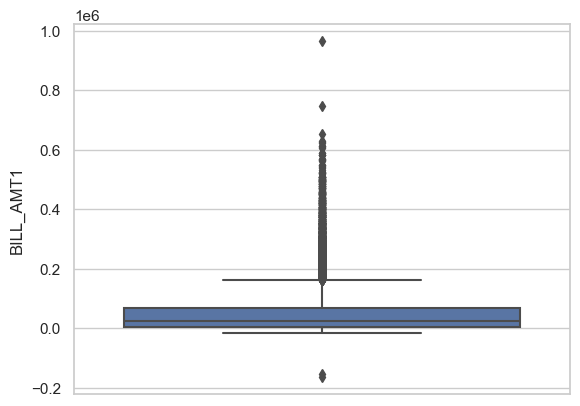

In [198]:
sns.boxplot(y='BILL_AMT1',data=data)

<AxesSubplot:ylabel='BILL_AMT1'>

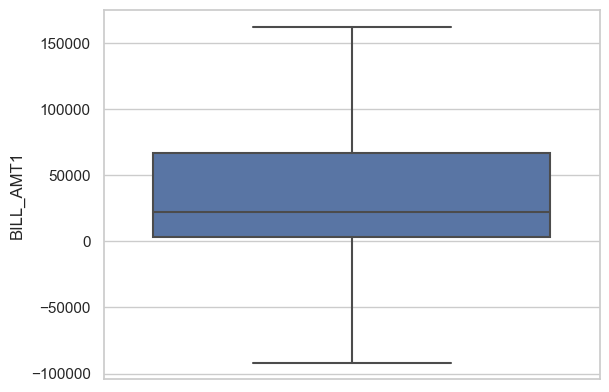

In [199]:
q1 = data['BILL_AMT1'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT1'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT1']=np.where(data['BILL_AMT1'] < low,low,data['BILL_AMT1']) # lower limit
data['BILL_AMT1']=np.where(data['BILL_AMT1'] > high,high,data['BILL_AMT1']) # higher limit

sns.boxplot(y='BILL_AMT1',data=data)

<AxesSubplot:ylabel='BILL_AMT2'>

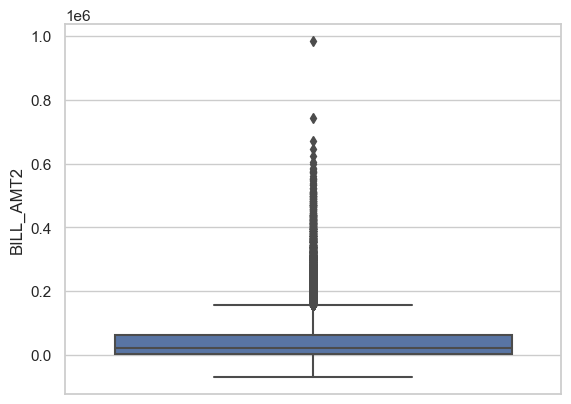

In [200]:
sns.boxplot(y='BILL_AMT2',data=data)

<AxesSubplot:ylabel='BILL_AMT2'>

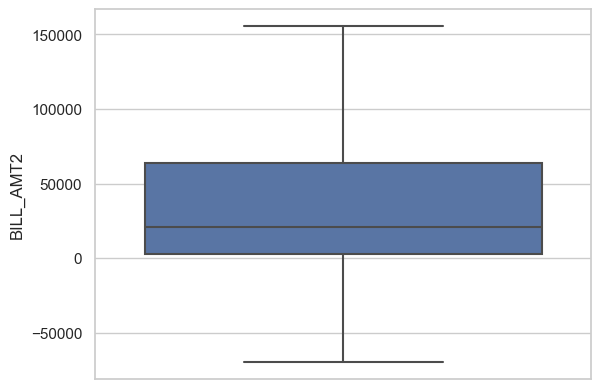

In [201]:
q1 = data['BILL_AMT2'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT2']=np.where(data['BILL_AMT2'] < low,low,data['BILL_AMT2']) # lower limit
data['BILL_AMT2']=np.where(data['BILL_AMT2'] > high,high,data['BILL_AMT2']) # higher limit

sns.boxplot(y='BILL_AMT2',data=data)

<AxesSubplot:ylabel='BILL_AMT3'>

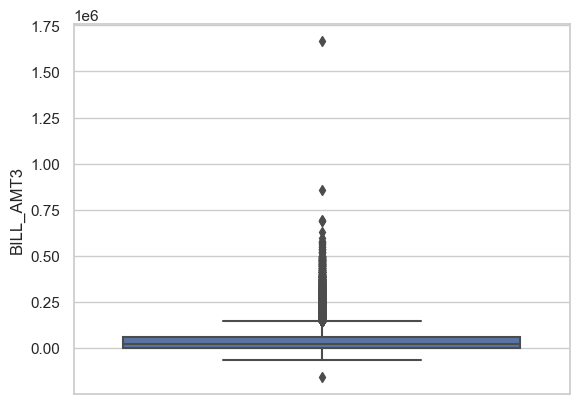

In [202]:
sns.boxplot(y='BILL_AMT3',data=data)

<AxesSubplot:ylabel='BILL_AMT3'>

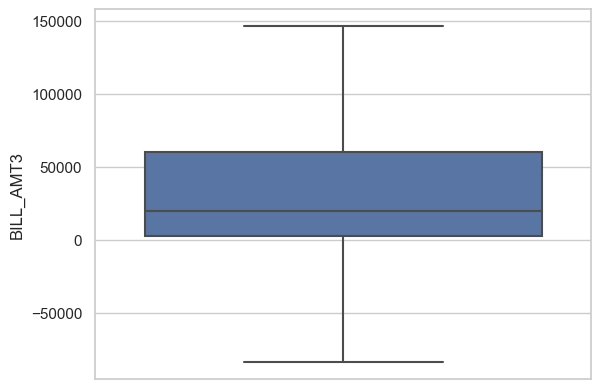

In [203]:
q1 = data['BILL_AMT3'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT3']=np.where(data['BILL_AMT3'] < low,low,data['BILL_AMT3']) # lower limit
data['BILL_AMT3']=np.where(data['BILL_AMT3'] > high,high,data['BILL_AMT3']) # higher limit

sns.boxplot(y='BILL_AMT3',data=data)

<AxesSubplot:ylabel='BILL_AMT4'>

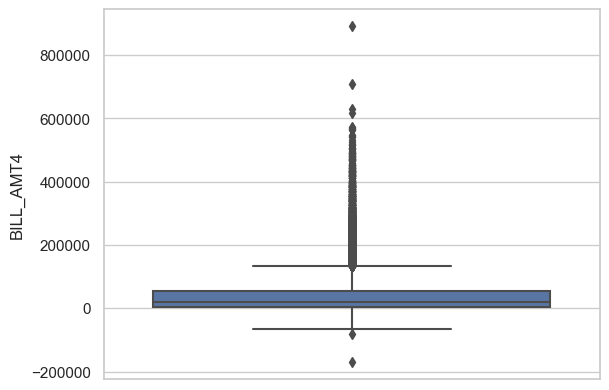

In [204]:
sns.boxplot(y='BILL_AMT4',data=data)

<AxesSubplot:ylabel='BILL_AMT4'>

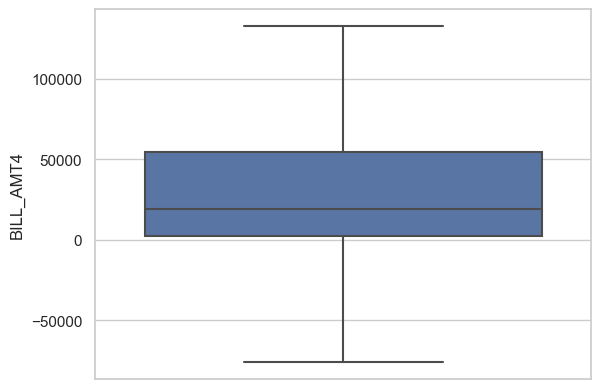

In [205]:
q1 = data['BILL_AMT4'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT4'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT4']=np.where(data['BILL_AMT4'] < low,low,data['BILL_AMT4']) # lower limit
data['BILL_AMT4']=np.where(data['BILL_AMT4'] > high,high,data['BILL_AMT4']) # higher limit

sns.boxplot(y='BILL_AMT4',data=data)

<AxesSubplot:ylabel='BILL_AMT5'>

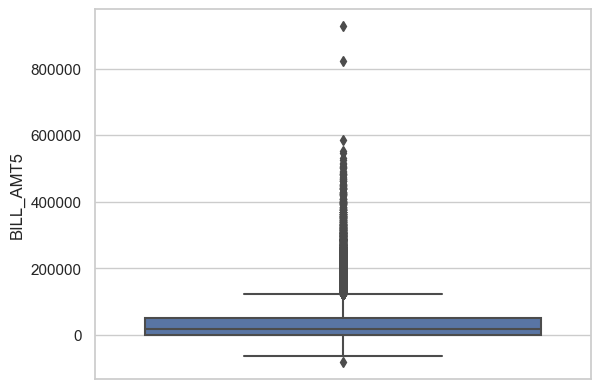

In [206]:
sns.boxplot(y='BILL_AMT5',data=data)

<AxesSubplot:ylabel='BILL_AMT5'>

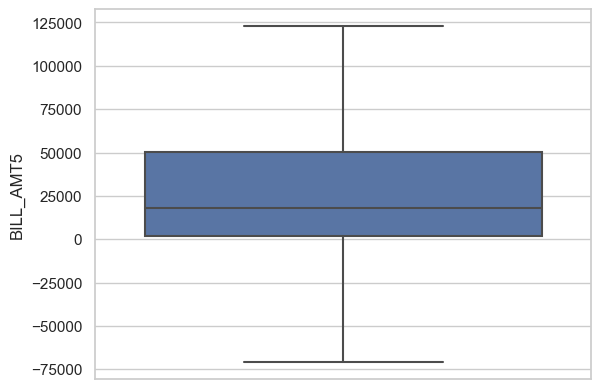

In [207]:
q1 = data['BILL_AMT5'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT5'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT5']=np.where(data['BILL_AMT5'] < low,low,data['BILL_AMT5']) # lower limit
data['BILL_AMT5']=np.where(data['BILL_AMT5'] > high,high,data['BILL_AMT5']) # higher limit

sns.boxplot(y='BILL_AMT5',data=data)

<AxesSubplot:ylabel='BILL_AMT6'>

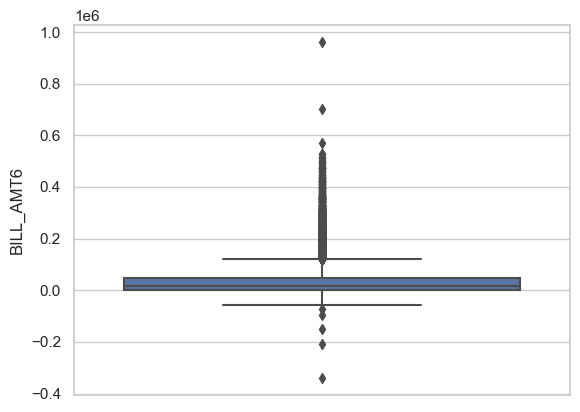

In [208]:
sns.boxplot(y='BILL_AMT6',data=data)

<AxesSubplot:ylabel='BILL_AMT6'>

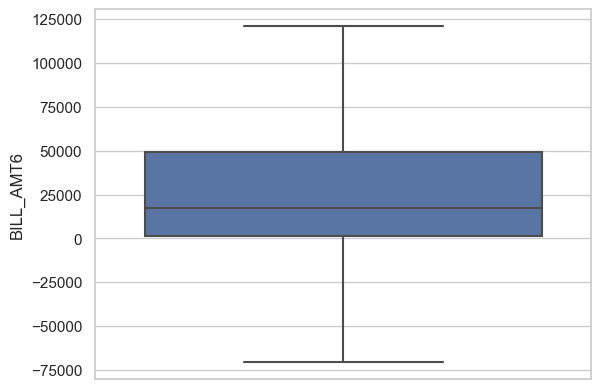

In [209]:
q1 = data['BILL_AMT6'].quantile(0.25)   # outlier treatement
q3 = data['BILL_AMT6'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['BILL_AMT6']=np.where(data['BILL_AMT6'] < low,low,data['BILL_AMT6']) # lower limit
data['BILL_AMT6']=np.where(data['BILL_AMT6'] > high,high,data['BILL_AMT6']) # higher limit

sns.boxplot(y='BILL_AMT6',data=data)

<AxesSubplot:ylabel='PAY_AMT1'>

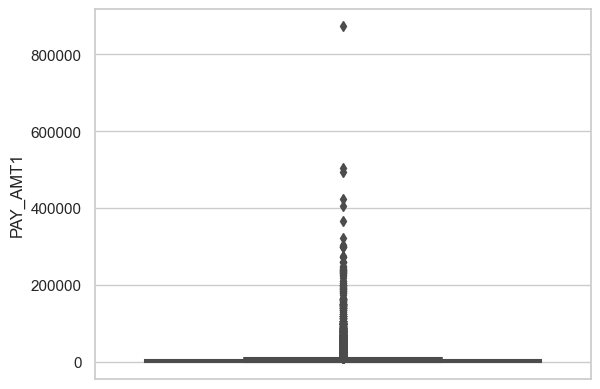

In [210]:
sns.boxplot(y='PAY_AMT1',data=data)

<AxesSubplot:ylabel='PAY_AMT1'>

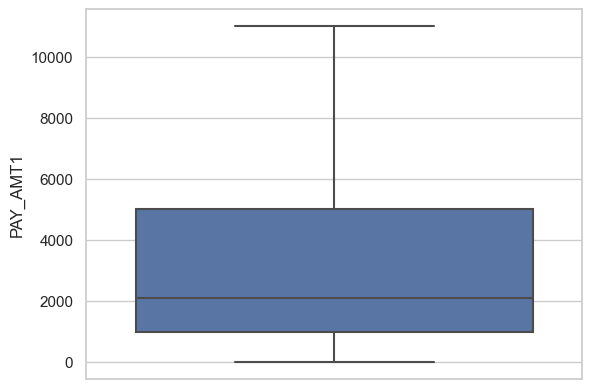

In [211]:
q1 = data['PAY_AMT1'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT1'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT1']=np.where(data['PAY_AMT1'] > high,high,data['PAY_AMT1']) # higher limit

sns.boxplot(y='PAY_AMT1',data=data)

<AxesSubplot:ylabel='PAY_AMT2'>

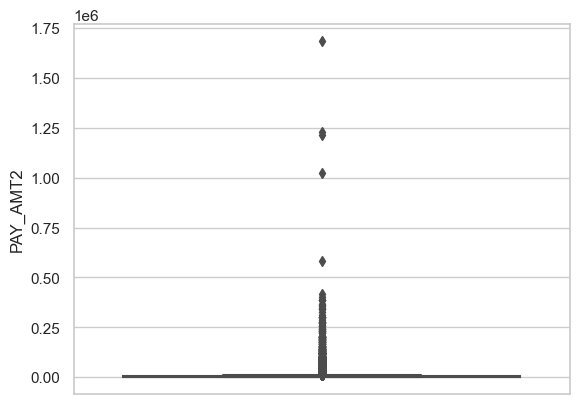

In [212]:
sns.boxplot(y='PAY_AMT2',data=data)

<AxesSubplot:ylabel='PAY_AMT2'>

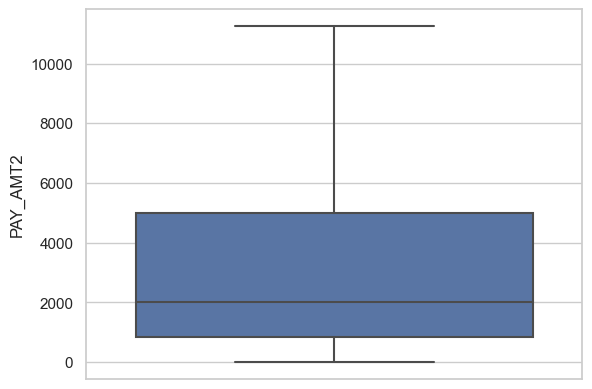

In [213]:
q1 = data['PAY_AMT2'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT2']=np.where(data['PAY_AMT2'] > high,high,data['PAY_AMT2']) # higher limit

sns.boxplot(y='PAY_AMT2',data=data)

<AxesSubplot:ylabel='PAY_AMT3'>

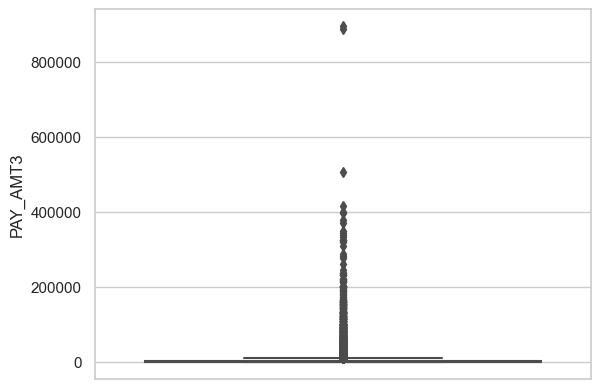

In [214]:
sns.boxplot(y='PAY_AMT3',data=data)

<AxesSubplot:ylabel='PAY_AMT3'>

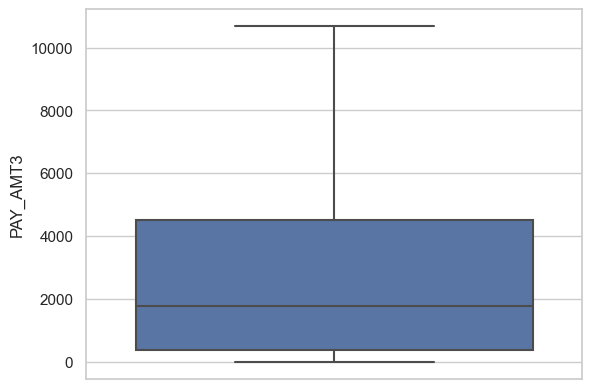

In [215]:
q1 = data['PAY_AMT3'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT3']=np.where(data['PAY_AMT3'] > high,high,data['PAY_AMT3']) # higher limit

sns.boxplot(y='PAY_AMT3',data=data)

<AxesSubplot:ylabel='PAY_AMT4'>

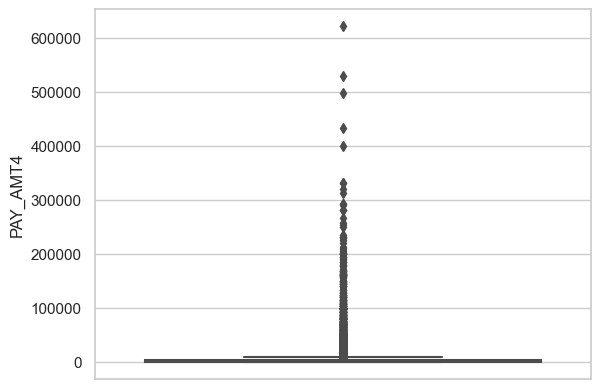

In [216]:
sns.boxplot(y='PAY_AMT4',data=data)

<AxesSubplot:ylabel='PAY_AMT4'>

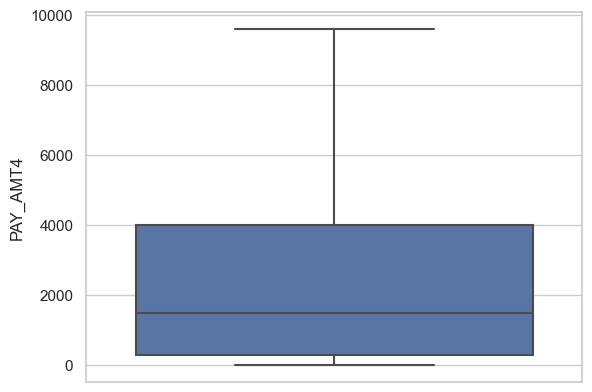

In [217]:
q1 = data['PAY_AMT4'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT4'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT4']=np.where(data['PAY_AMT4'] > high,high,data['PAY_AMT4']) # higher limit

sns.boxplot(y='PAY_AMT4',data=data)

<AxesSubplot:ylabel='PAY_AMT5'>

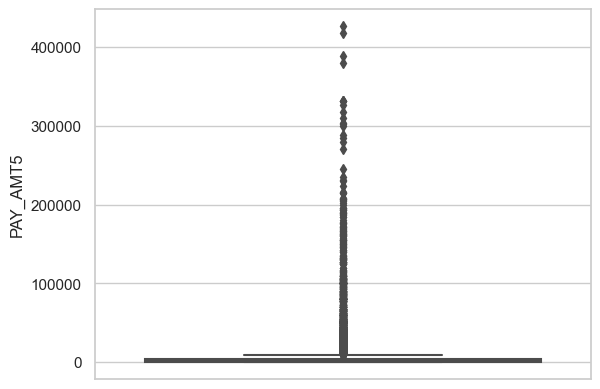

In [218]:
sns.boxplot(y='PAY_AMT5',data=data)

<AxesSubplot:ylabel='PAY_AMT5'>

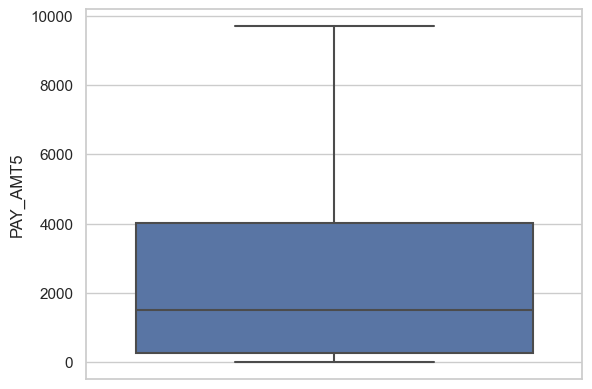

In [219]:
q1 = data['PAY_AMT5'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT5'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT5']=np.where(data['PAY_AMT5'] > high,high,data['PAY_AMT5']) # higher limit

sns.boxplot(y='PAY_AMT5',data=data)

<AxesSubplot:ylabel='PAY_AMT6'>

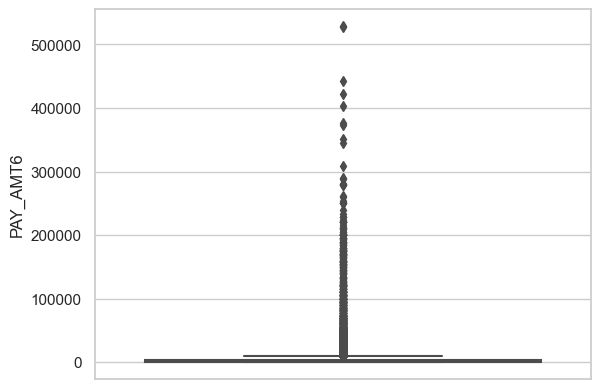

In [220]:
sns.boxplot(y='PAY_AMT6',data=data)

<AxesSubplot:ylabel='PAY_AMT6'>

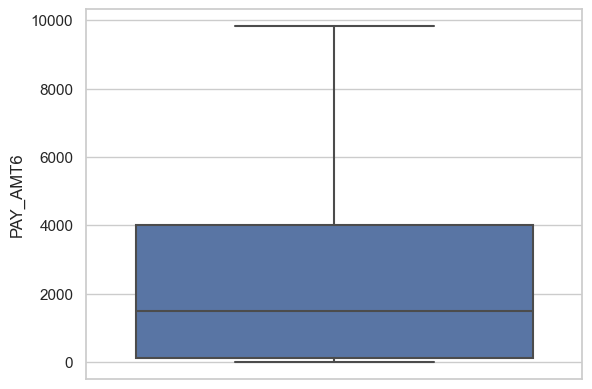

In [221]:
q1 = data['PAY_AMT6'].quantile(0.25)   # outlier treatement
q3 = data['PAY_AMT6'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

data['PAY_AMT6']=np.where(data['PAY_AMT6'] > high,high,data['PAY_AMT6']) # higher limit

sns.boxplot(y='PAY_AMT6',data=data)

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [222]:
data_final=data

In [223]:
data_final

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
2        20000.0    2        2.0         1  24.0    1.5    1.5   -1.0   -1.0   
3       120000.0    2        2.0         2  26.0   -1.0    1.5    0.0    0.0   
4        90000.0    2        2.0         2  34.0    0.0    0.0    0.0    0.0   
5        50000.0    2        2.0         1  37.0    0.0    0.0    0.0    0.0   
6        50000.0    1        2.0         1  57.0   -1.0    0.0   -1.0    0.0   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
29997   220000.0    1        3.0         1  39.0    0.0    0.0    0.0    0.0   
29998   150000.0    1        3.0         2  43.0   -1.0   -1.0   -1.0   -1.0   
29999    30000.0    1        2.0         2  37.0    1.5    1.5    1.5   -1.0   
30000    80000.0    1        3.0         1  41.0    1.0   -1.0    0.0    0.0   
30001    50000.0    1        2.0         1  46.0    0.0    0.0    0.0    0.0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2       -2.0  ...        0.0        0.0        0.0       0.0     689.0   
3        0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
4        0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
5        0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
6        0.0  ...    20940.0    19146.0    19131.0    2000.0   11250.5   
...      ...  ...        ...        ...        ...       ...       ...   
29997    0.0  ...    88004.0    31237.0    15980.0    8500.0   11250.5   
29998    0.0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29999    0.0  ...    20878.0    20582.0    19357.0       0.0       0.0   
30000    0.0  ...    52774.0    11855.0    48944.0   11015.0    3409.0   
30001    0.0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
2           0.0       0.0       0.0       0.0        1  
3        1000.0    1000.0       0.0    2000.0        1  
4        1000.0    1000.0    1000.0    5000.0        0  
5        1200.0    1100.0    1069.0    1000.0        0  
6       10000.0    9000.0     689.0     679.0        0  
...         ...       ...       ...       ...      ...  
29997    5003.0    3047.0    5000.0    1000.0        0  
29998    8998.0     129.0       0.0       0.0        0  
29999   10677.5    4200.0    2000.0    3100.0        1  
30000    1178.0    1926.0    9700.0    1804.0        1  
30001    1430.0    1000.0    1000.0    1000.0        1  

[30000 rows x 24 columns]

In [224]:
# define our input variable (X) & output variable
X = data_final.drop('default', axis = 1)
Y = data_final[['default']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Step 4 : Performing Logistic Regression

In [225]:
# Needed to run the logistic regression
import statsmodels.api as smf
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)
b=smf.Logit(y_train,X_1)
result=b.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.465006
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.119     
Dependent Variable: default          AIC:              19578.2678
Date:               2023-06-03 12:20 BIC:              19769.1225
No. Observations:   21000            Log-Likelihood:   -9765.1   
Df Model:           23               LL-Null:          -11085.   
Df Residuals:       20976            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.5296    0.1436  -3.6884  0.0002  -0.8111  -0.2482
LIMIT_BAL      0.0000    0.0000   0.0195  0.9844  -0.0000   0.

# Backward Elimination

In [226]:
# removes variables with p-value > 0.05

cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X_train[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    model=sm.Logit(y_train,X_1).fit() # Regression model
    p = pd.Series(model.pvalues.values[1:],index = cols) # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

Optimization terminated successfully.
         Current function value: 0.465006
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465006
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465007
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465019
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465046
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465149
         Iterations 6


In [227]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20982
Method:                           MLE   Df Model:                           17
Date:                Sat, 03 Jun 2023   Pseudo R-squ.:                  0.1188
Time:                        12:20:39   Log-Likelihood:                -9768.1
converged:                       True   LL-Null:                       -11085.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5355      0.142     -3.780      0.000      -0.813      -0.258
SEX           -0.0921      0.037     -2.520      0.012      -0.164      -0.020
EDUCATION     -0.0830      0.026     -3.176      0.001      -0.134      -0.032
MARRIAGE      -0.1501      0.038     -3.984      0.000      -0.224      -0.076
AGE            0.0080      0.002      3.756      0.000       0.004       0.012
PAY_0          0.6164      0.025     24.826      0.000       0.568       0.665
PAY_2          0.1516      0.031      4.896      0.000       0.091       0.212
PAY_3          0.0790      0.036      2.179      0.029       0.008       0.150
PAY_4          0.1024      0.031      3.267      0.001       0.041       0.164
BILL_AMT1  -4.276e-06   7.83e-07     -5.463      0.000   -5.81e-06   -2.74e-06
BILL_AMT4   5.543e-06   1.59e-06      3.477      0.001    2.42e-06    8.67e-06
BILL_AMT5  -5.398e-06   2.01e-06     -2.685      0.007   -9.34e-06   -1.46e-06
BILL_AMT6   4.912e-06    1.7e-06      2.884      0.004    1.57e-06    8.25e-06
PAY_AMT1    -4.85e-05   8.26e-06     -5.874      0.000   -6.47e-05   -3.23e-05
PAY_AMT2   -4.936e-05    8.3e-06     -5.948      0.000   -6.56e-05   -3.31e-05
PAY_AMT3   -2.685e-05   8.37e-06     -3.209      0.001   -4.33e-05   -1.04e-05
PAY_AMT5   -2.854e-05   9.19e-06     -3.106      0.002   -4.65e-05   -1.05e-05
PAY_AMT6   -2.071e-05   8.15e-06     -2.540      0.011   -3.67e-05   -4.73e-06
==============================================================================
"""

# Step 6 : Predictions on Train Dataset

In [228]:
y_predict=model.predict(X_1)

In [229]:
train=pd.concat([X_train,y_train],axis=1)

In [230]:
train['Probs']=y_predict
train['Predicted']=0
train.loc[(train['Probs']> 0.7),'Predicted']=1

In [231]:
# sort the pandas dataframe by descending value of single column
train.sort_values(by='default',ascending=0,inplace=True)

In [232]:
train.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
3401     50000.0    1        3.0         2  22.0    0.0    0.0    0.0    0.0   
13514    50000.0    2        2.0         1  55.0    0.0    0.0    0.0    0.0   
12320    20000.0    2        1.0         2  27.0    1.5    1.5    1.5    0.0   
16106    60000.0    2        3.0         1  48.0    0.0    0.0    0.0    0.0   
19027   440000.0    2        2.0         2  28.0    1.0    1.5    1.5    0.0   

       PAY_5  ...   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
3401    -1.0  ...    1080.000    1056.0    1000.0      40.0    1377.0   
13514    0.0  ...   14453.000    2079.0    2001.0     500.0    4423.0   
12320    0.0  ...   18036.000    1700.0       0.0     800.0    1361.0   
16106    0.0  ...   35447.000    2500.0    2000.0    1900.0    1500.0   
19027    0.0  ...  121111.625   11000.0      54.0    7530.0    7648.0   

       PAY_AMT5  PAY_AMT6  default     Probs  Predicted  
3401     1080.0     382.0        1  0.238506          0  
13514    4000.0    2000.0        1  0.251444          0  
12320       0.0     800.0        1  0.568944          0  
16106    1300.0    1300.0        1  0.241961          0  
19027    6310.0    3312.0        1  0.266358          0  

[5 rows x 26 columns]

# Step 7 : Model Performance Metrics

In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['default'], train['Predicted'])
print(confusion_matrix)

[[16363     1]
 [ 4617    19]]


In [234]:
Accuracy_Train=((16363+19)/(16363+19+1+4617)*100)
print(Accuracy_Train)

78.00952380952381


In [235]:
log_train=Accuracy_Train

# Step 8 : Predictions on Test Dataset

In [236]:
X_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [237]:
abc=X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'BILL_AMT1','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6']]

In [238]:
abc=sm.add_constant(abc)

In [239]:
y_prediction=model.predict(abc)

In [240]:
test=pd.concat([X_test,y_test],axis=1)

In [241]:
test['Probs']=y_prediction

In [242]:
def conditions(test):
    if (test['Probs']> 0.7):
        return 1
    else:
        return 0

In [243]:
test['Predicted'] = test.apply(conditions, axis=1)

In [244]:
# Step 8 : Predictions on Test Dataset

X_test.columns

abc=X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'BILL_AMT1','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6']]

abc=sm.add_constant(abc)

y_prediction=model.predict(abc)

test=pd.concat([X_test,y_test],axis=1)

test['Probs']=y_prediction

def conditions(test):
    if (test['Probs']> 0.7):
        return 1
    else:
        return 0

test['Predicted'] = test.apply(conditions, axis=1)

# Step 9 : Model Performance Metrics on Test data 

In [245]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['default'], test['Predicted'])
print(confusion_matrix)

[[6999    1]
 [1999    1]]


In [246]:
Accuracy_test=((6999+1)/(6999+1+1+1999)*100)
Accuracy_test

77.77777777777779

In [247]:
log_test=Accuracy_test

In [248]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7000
           1       0.50      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.64      0.50      0.44      9000
weighted avg       0.72      0.78      0.68      9000



In [249]:
X_train_1=X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'BILL_AMT1','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6']]

In [250]:
X_test_1=X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'BILL_AMT1','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6']]

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model_2=logreg.fit(X_train_1, y_train)

C:\Users\amith\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Step 10 :- ROCR & KS PLOT

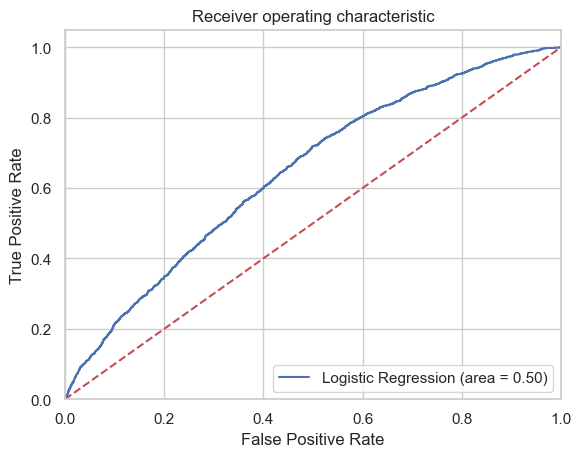

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_2.predict(X_test_1))
fpr, tpr, thresholds = roc_curve(y_test, model_2.predict_proba(X_test_1)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [253]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
from sklearn.model_selection import GridSearchCV

In [254]:
pima = data
pima.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
2    20000.0    2        2.0         1  24.0    1.5    1.5   -1.0   -1.0   
3   120000.0    2        2.0         2  26.0   -1.0    1.5    0.0    0.0   
4    90000.0    2        2.0         2  34.0    0.0    0.0    0.0    0.0   
5    50000.0    2        2.0         1  37.0    0.0    0.0    0.0    0.0   
6    50000.0    1        2.0         1  57.0   -1.0    0.0   -1.0    0.0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
2   -2.0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
3    0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
4    0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
5    0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
6    0.0  ...    20940.0    19146.0    19131.0    2000.0   11250.5   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
2       0.0       0.0       0.0        1  
3    1000.0       0.0    2000.0        1  
4    1000.0    1000.0    5000.0        0  
5    1100.0    1069.0    1000.0        0  
6    9000.0     689.0     679.0        0  

[5 rows x 24 columns]

In [255]:
dep='default'
obj=pima.dtypes==np.object
obj[dep]=False
dummydf=pd.DataFrame()
 
for i in pima.columns[obj]:
    dummy =pd.get_dummies(pima[i],drop_first=True)
    dummydf = pd.concat([dummydf,dummy],axis=1)

C:\Users\amith\AppData\Local\Temp\ipykernel_20408\4230010138.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj=pima.dtypes==np.object


In [256]:
data1=pima
data1=pd.concat([data1,dummydf],axis=1)
obj1=data1.dtypes==np.object
X=data1.drop(data1.columns[obj1],axis=1)
X=X.drop([dep],axis=1)

X.columns = 'V_'+X.columns
print('X_col\n',X.columns)
Y=data1[dep]

X_col
 Index(['V_LIMIT_BAL', 'V_SEX', 'V_EDUCATION', 'V_MARRIAGE', 'V_AGE', 'V_PAY_0',
       'V_PAY_2', 'V_PAY_3', 'V_PAY_4', 'V_PAY_5', 'V_PAY_6', 'V_BILL_AMT1',
       'V_BILL_AMT2', 'V_BILL_AMT3', 'V_BILL_AMT4', 'V_BILL_AMT5',
       'V_BILL_AMT6', 'V_PAY_AMT1', 'V_PAY_AMT2', 'V_PAY_AMT3', 'V_PAY_AMT4',
       'V_PAY_AMT5', 'V_PAY_AMT6'],
      dtype='object')


C:\Users\amith\AppData\Local\Temp\ipykernel_20408\3774785137.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj1=data1.dtypes==np.object


In [257]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=20)

print("Train Data Size - ",x_train.shape[0],'\n')
print("Test Data Size - ",x_test.shape[0],'\n')

Train Data Size -  24000 

Test Data Size -  6000 



In [258]:
# FULL DECISION TREE [without max_depth]
modCART = DecisionTreeClassifier()
modCART.fit(x_train,y_train)

DecisionTreeClassifier()

In [259]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import graphviz
from sklearn.externals.six import StringIO
from  IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modCART,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())


(process:8812): GLib-GIO-WARNING **: 12:21:32.753: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:8812): GLib-GIO-WARNING **: 12:21:32.768: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.54.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs

(process:8812): GLib-GIO-WARNING **: 12:21:32.800: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.238397 to fit



In [260]:
#FULL DECISION TREE PREDICTION
y_predict = modCART.predict(x_train) #prediction of the train data
print(y_predict)

[0 0 1 ... 0 0 0]


In [261]:
from sklearn.metrics import confusion_matrix  # confusion matrix of train data
confusion_matrix = confusion_matrix(y_train, y_predict)
print(confusion_matrix)

[[18700     1]
 [   15  5284]]


In [262]:
Accuracy_Train_FN= (18700+5284)/(18700+5284+1+15)*100
print(f"Accuracy of Train Data : {Accuracy_Train_FN}")

Accuracy of Train Data : 99.93333333333332


In [263]:
tree_train = Accuracy_Train_FN

In [264]:
y_predict_test=modCART.predict(x_test) #prediction of the test data
print(y_predict_test)

[0 1 1 ... 0 0 0]


In [265]:
from sklearn.metrics import confusion_matrix  # confusion matrix of test data
confusion_matrix = confusion_matrix(y_test, y_predict_test)
print(confusion_matrix)

[[3794  869]
 [ 777  560]]


In [266]:
Accuracy_Train_FT= (3801+564)/(3801+564+862+773)*100
print(f"Accuracy of Test Data : {Accuracy_Train_FT}")

Accuracy of Test Data : 72.75


In [267]:
tree_test = Accuracy_Train_FT

In [268]:
# Optimum Depth calculation
modCart = DecisionTreeClassifier()
param_grid = {"max_depth":np.arange(3,10)}
grids = GridSearchCV(modCart,param_grid)
grids.fit(x_train,y_train)
tree_preds = grids.predict_proba(x_test)[:,-1]
tree_performabce = roc_auc_score(y_test,tree_preds)

print("DecisionTree: Area under the ROC curve - {}".format(tree_performabce))

DecisionTree: Area under the ROC curve - 0.7481004280903903


In [269]:
grids.best_params_ # Optimum Depth

{'max_depth': 4}

In [270]:
# DECISION TREE WITH OPTIMUM DEPTH [with max_depth]
modCART = DecisionTreeClassifier(max_depth=4)
modCART.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

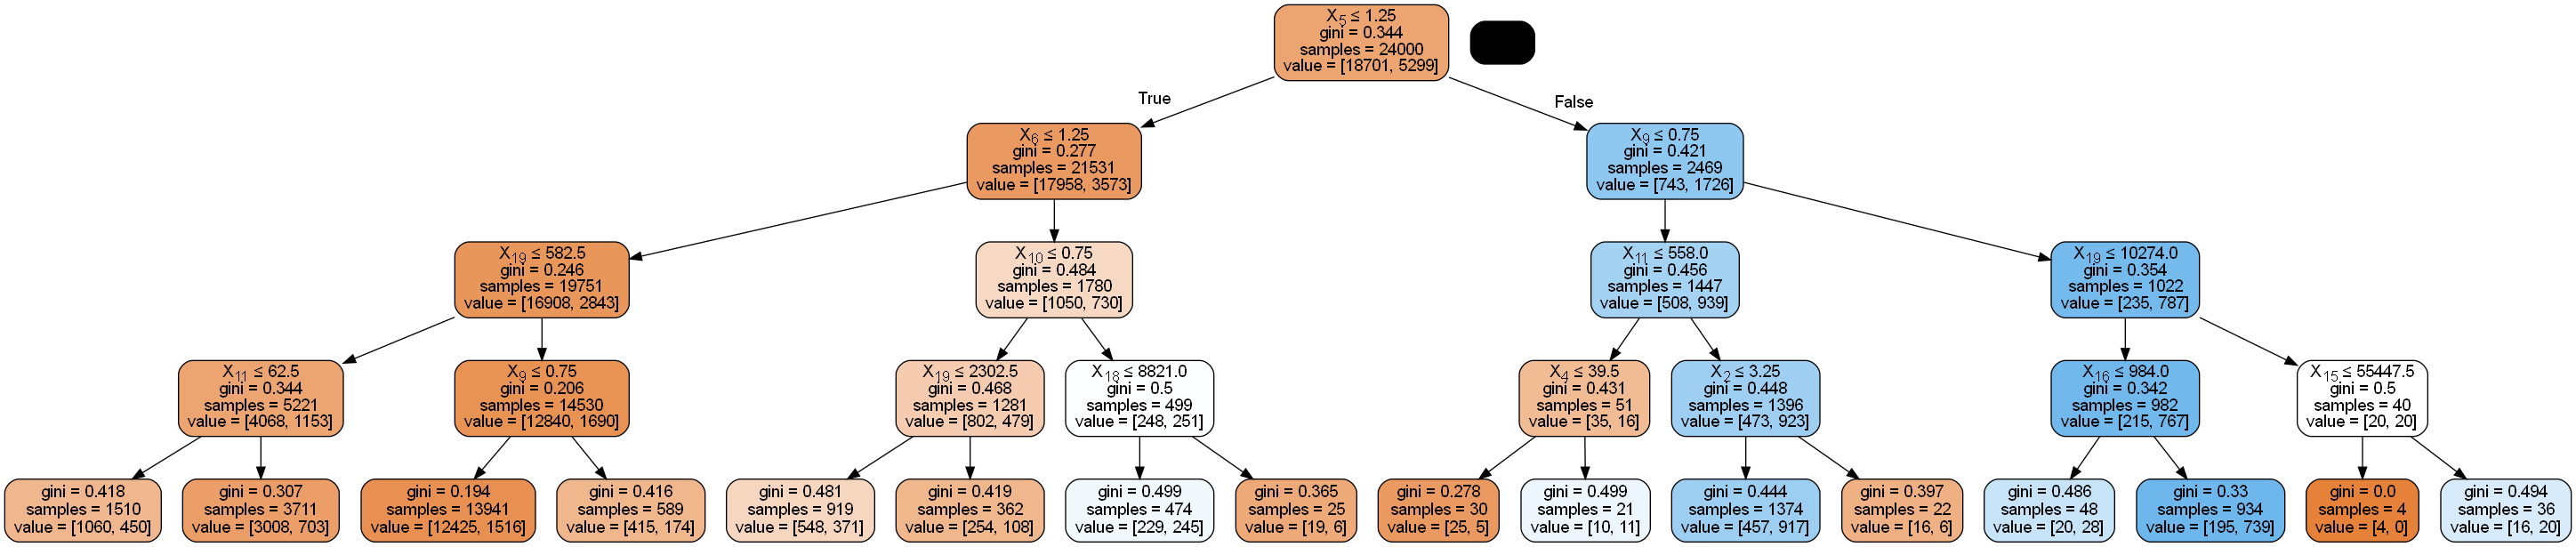

In [271]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import graphviz
from sklearn.externals.six import StringIO
from  IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modCART,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [272]:
# DECISION TREE WITH Optimum Depth PREDICTION
y_predict = modCART.predict(x_train) #prediction of the train data
print(y_predict)

[0 0 1 ... 0 0 0]


In [273]:
from sklearn.metrics import confusion_matrix  # confusion matrix of train data
confusion_matrix = confusion_matrix(y_train, y_predict)
print(confusion_matrix)

[[17774   927]
 [ 3339  1960]]


In [274]:
Accuracy_Train_ON= (17774+1960)/(17774+1960+927+3339)*100
print(f"Accuracy of Train Data : {Accuracy_Train_ON}")

Accuracy of Train Data : 82.22500000000001


In [275]:
dtree_train = Accuracy_Train_ON

In [276]:
y_predict_test=modCART.predict(x_test) #prediction of the test data
print(y_predict_test)

[0 1 0 ... 0 0 0]


In [277]:
from sklearn.metrics import confusion_matrix  # confusion matrix of test data
confusion_matrix = confusion_matrix(y_test, y_predict_test)
print(confusion_matrix)

[[4411  252]
 [ 805  532]]


In [278]:
Accuracy_Train_OT= (4411+532)/(4411+532+252+805)*100
print(f"Accuracy of Test Data : {Accuracy_Train_OT}")

Accuracy of Test Data : 82.38333333333333


In [279]:
dtree_test = Accuracy_Train_OT

# Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier
lst = [100,200,300,500,800]
for x in lst:
    rfc = RandomForestClassifier(n_estimators = x,random_state = 1)
    rfc.fit(x_train,y_train)

    y_pred_rfc = rfc.predict(x_test)

    print(f"({x})score: ", rfc.score(x_test, y_test))

(100)score:  0.817
(200)score:  0.8156666666666667
(300)score:  0.8156666666666667
(500)score:  0.8185
(800)score:  0.8188333333333333


In [281]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
# print("y_test == 1 :" + str(len(y_test[y_test==1]))) # 29
cm_rfc

array([[4387,  276],
       [ 811,  526]], dtype=int64)

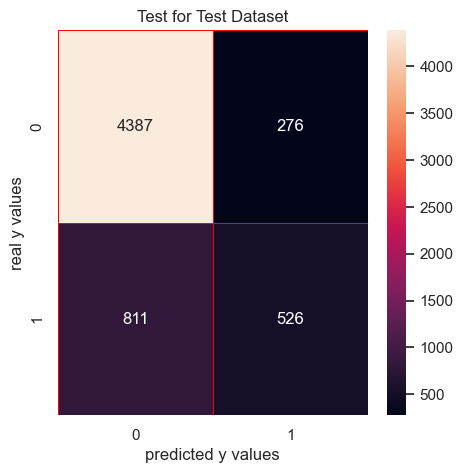

In [282]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

precision_score:  0.655860349127182
recall_score:  0.39341810022438295
f1_score:  0.4918186068256194


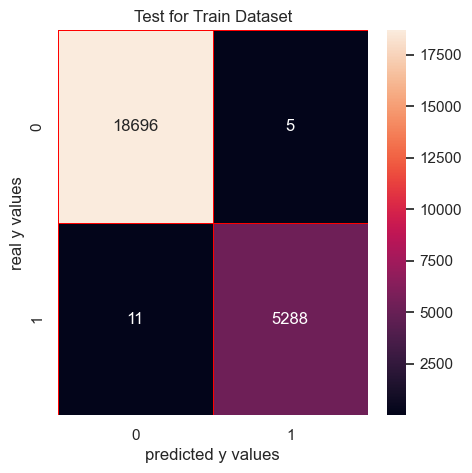

In [283]:

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_rfc))
print("recall_score: ", recall_score(y_test, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_rfc))

cm_rfc_train = confusion_matrix(y_train, rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

# K-NN

C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

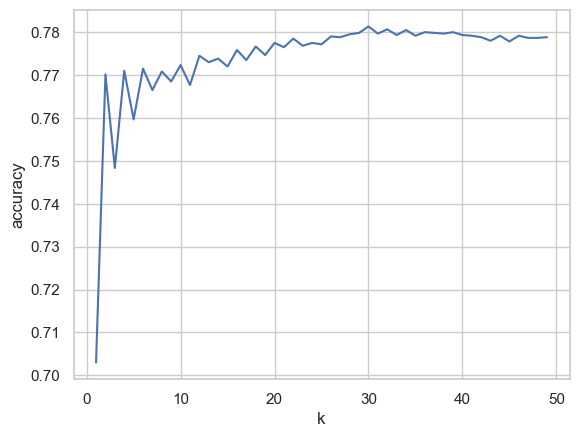

In [284]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train, y_train)
    scores.append(knn_n.score(x_test, y_test))
   
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()


In [285]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [286]:
y_pred_knn = knn.predict(x_test)
print("score of 3 :",knn.score(x_test,y_test))

C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


score of 3 : 0.7483333333333333


C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print("score: ", nb.score(x_test,y_test))

score:  0.6036666666666667


# Model Comparison

# train

C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


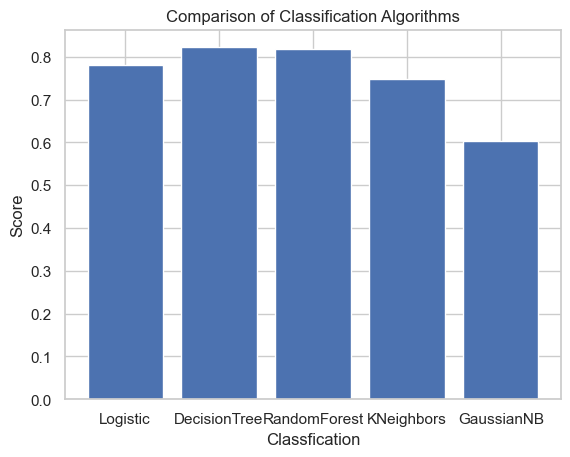

In [301]:
y = np.array([(log_train/100), (dtree_train/100), rfc.score(x_test, y_test), knn.score(x_test, y_test), nb.score(x_test, y_test)])
x = ["Logistic","DecisionTree","RandomForest","KNeighbors","GaussianNB"]


plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

# test

C:\Users\amith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


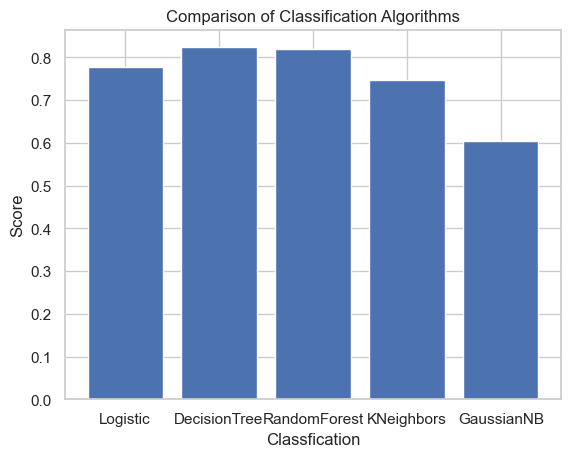

In [300]:
y = np.array([(log_test/100), (dtree_test/100), rfc.score(x_test, y_test), knn.score(x_test, y_test), nb.score(x_test, y_test)])
x = ["Logistic","DecisionTree","RandomForest","KNeighbors","GaussianNB"]


plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()